In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='ISO-8859-1')


In [35]:
print(df.shape)

(11251, 15)


In [10]:
print(df.info)

<bound method DataFrame.info of        User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

       

In [11]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [14]:
df.drop(columns=["Status", 'unnamed1'], inplace=True)

In [15]:
df.isnull()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [20]:
df[['Age','Orders','Amount']].describe().loc['mean']

,mean
Age,35.421207
Orders,2.489290
Amount,9453.610858


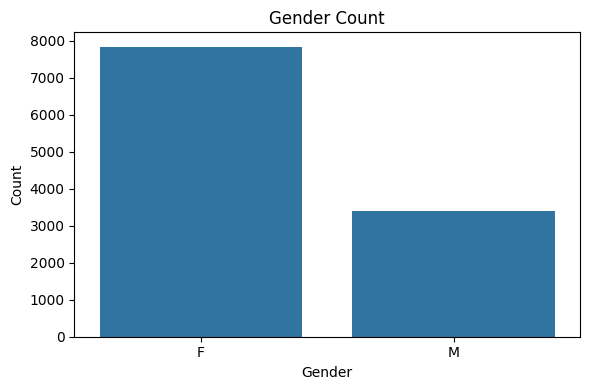

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()



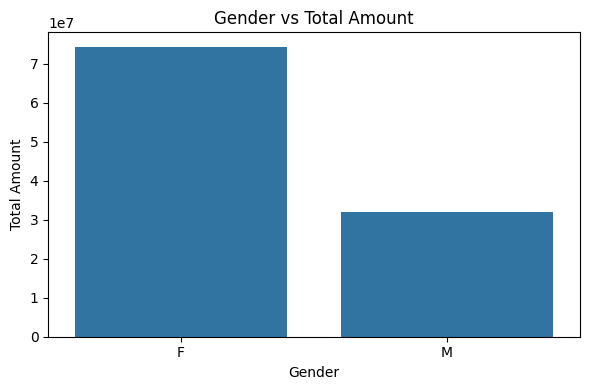

In [38]:
plt.figure(figsize=(6, 4))
gender_amount = df.groupby('Gender')['Amount'].sum().reset_index()
sns.barplot(x='Gender', y='Amount', data=gender_amount)
plt.title('Gender vs Total Amount')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.tight_layout()



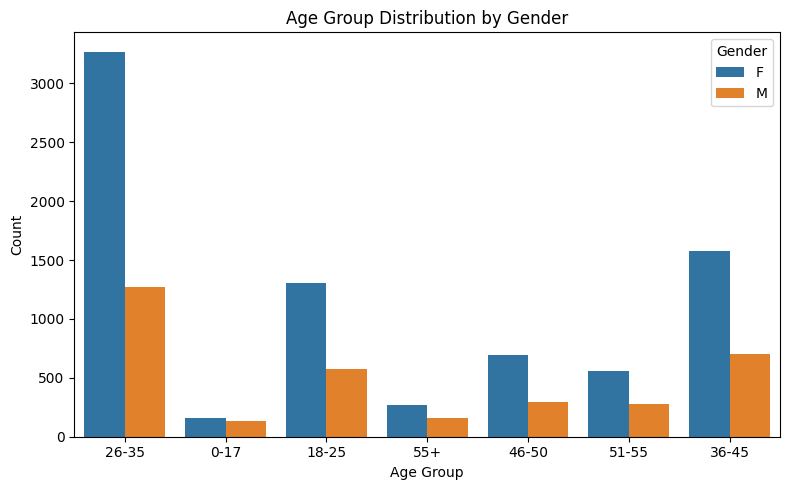

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Age Group', hue='Gender')
plt.title('Age Group Distribution by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()



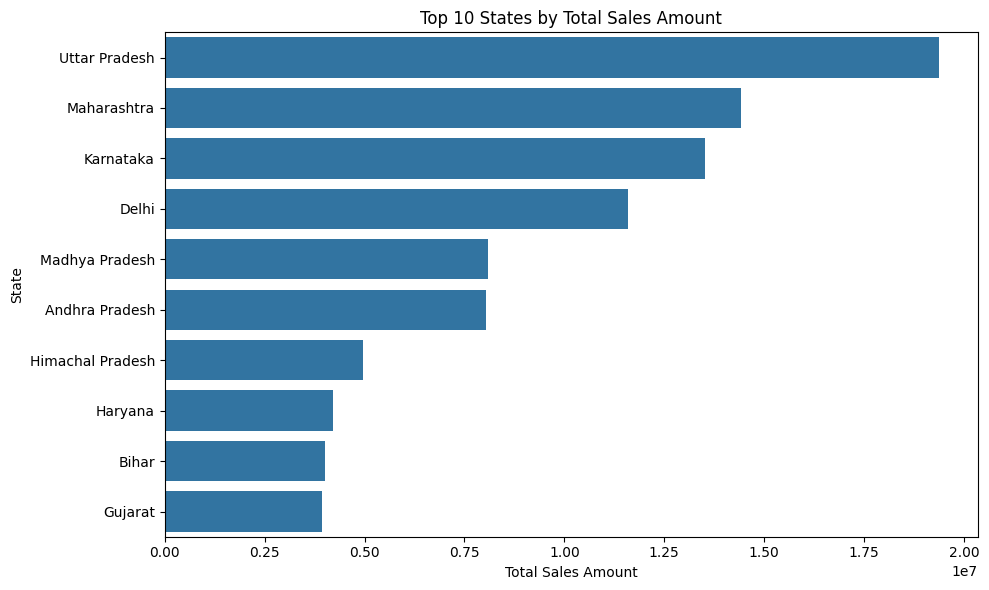

In [40]:
top_states_amount = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states_amount.values, y=top_states_amount.index)
plt.title('Top 10 States by Total Sales Amount')
plt.xlabel('Total Sales Amount')
plt.ylabel('State')
plt.tight_layout()



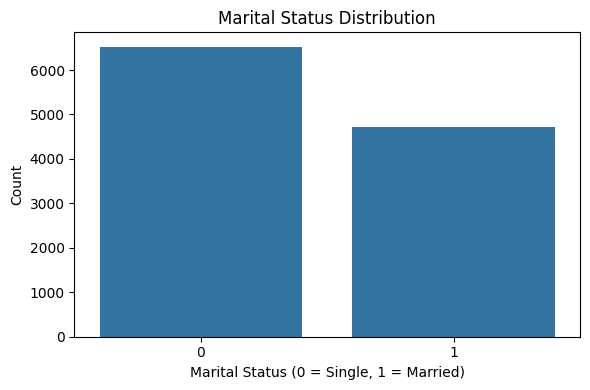

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Marital_Status')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status (0 = Single, 1 = Married)')
plt.ylabel('Count')
plt.tight_layout()



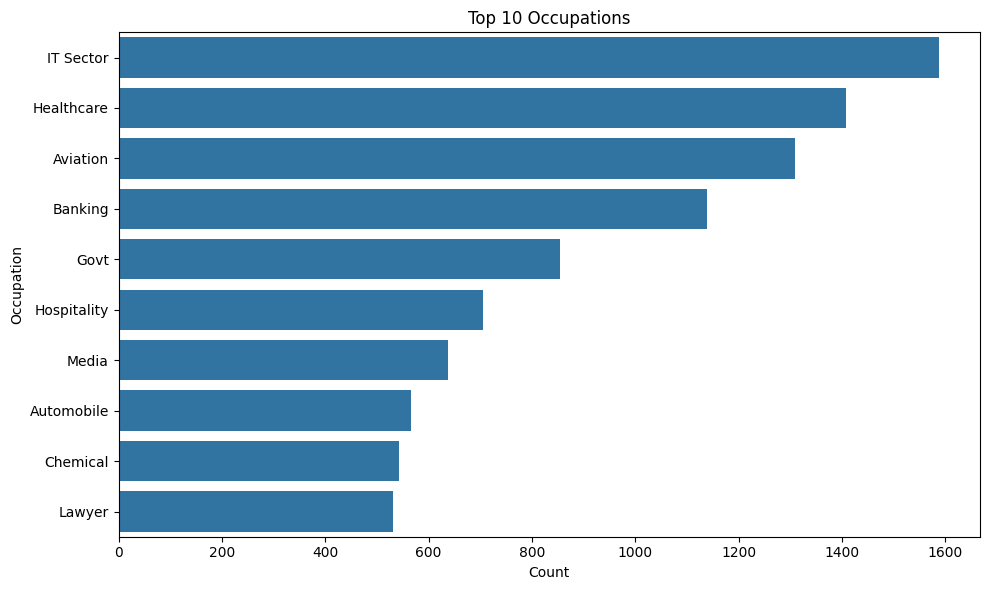

In [42]:
top_occupations = df['Occupation'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_occupations.values, y=top_occupations.index)
plt.title('Top 10 Occupations')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.tight_layout()


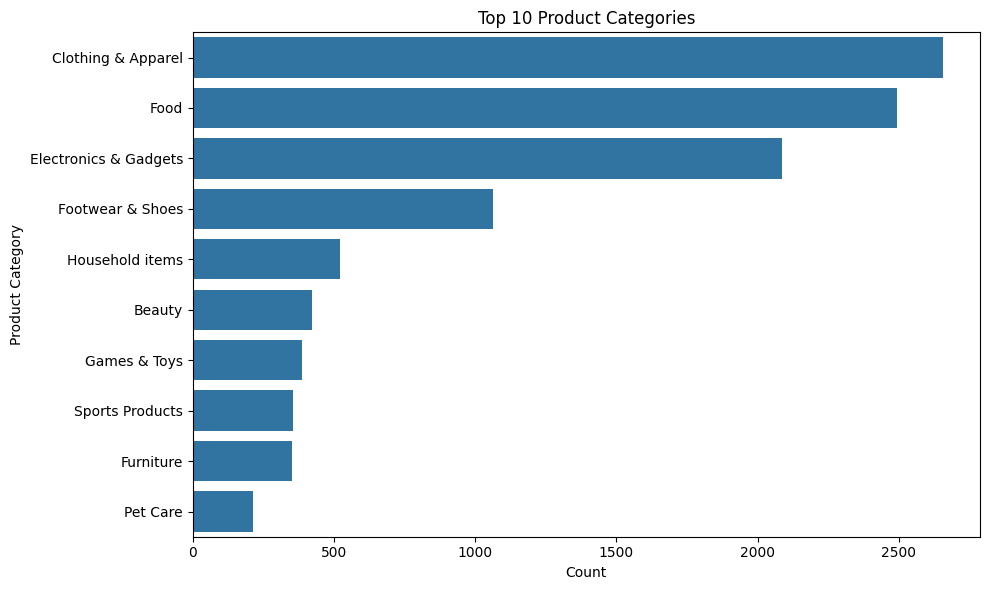

In [41]:
top_categories = df['Product_Category'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Product Categories')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.tight_layout()


In [29]:
df.groupby('Product_ID')['Orders'].sum().sort_values(ascending=False).head(10)



,Orders
Product_ID,
P00265242,127
P00110942,116
P00237542,91
P00184942,82
P00114942,79
P00025442,79
P00117942,76
P00145042,76
P00044442,75
